# Projekt Indywidualny 2024/2025
Zadaniem tego projektu jest potwierdzenie posiadania przez Państwa umiejętności budowania modelu regresji na przykładzie danych zawierających ceny nieruchomości znajdujących się w pliku "domy.csv". W zadaniu należy wykorzystać wiedzę poznaną na zajęciach laboratoryjnych i wykładach w tym metody regularyzacji, metody wyboru i tworzenia nowych zmiennych, określenie jakości modelu, metody optymalizacji.

Za projekt można zdobyć 50 pkt. Za każde zadanie można dostać od 0 do 5 pkt. Każde zadanie musi być opisane stosownymi komentarzami i podsumowane wnioskami wynikającymi z wykonanych obliczeń.

**!!! Do wykonania projektu nie możemy korzystać z żadnych dodatkowych pakietów niż poniższe 5 !!!**

Czas na wykonanie projektu - 16.12.2024 r.

In [325]:
# Wyczanie pakietów podstawowych
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [326]:
# Wczytanie danych
dtype_dict = {'bathrooms': float, 'waterfront': int, 'sqft_above': int, 'sqft_living15': float, 'grade': int,
              'yr_renovated': int, 'price': float, 'bedrooms': float, 'zipcode': str, 'long': float,
              'sqft_lot15': float, 'sqft_living': float, 'floors': str, 'condition': int, 'lat': float, 'date': str,
              'sqft_basement': int, 'yr_built': int, 'id': str, 'sqft_lot': int, 'view': int}
domy = pd.read_csv("domy.csv", sep=',', dtype=dtype_dict)
domy

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00000,3.00000,1.00000,1180.00000,5650,1,0,0,...,7,1180,0,1955,0,98178,47.51120,-122.25700,1340.00000,5650.00000
1,6414100192,20141209T000000,538000.00000,3.00000,2.25000,2570.00000,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690.00000,7639.00000
2,5631500400,20150225T000000,180000.00000,2.00000,1.00000,770.00000,10000,1,0,0,...,6,770,0,1933,0,98028,47.73790,-122.23300,2720.00000,8062.00000
3,2487200875,20141209T000000,604000.00000,4.00000,3.00000,1960.00000,5000,1,0,0,...,7,1050,910,1965,0,98136,47.52080,-122.39300,1360.00000,5000.00000
4,1954400510,20150218T000000,510000.00000,3.00000,2.00000,1680.00000,8080,1,0,0,...,8,1680,0,1987,0,98074,47.61680,-122.04500,1800.00000,7503.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0263000018,20140521T000000,360000.00000,3.00000,2.50000,1530.00000,1131,3,0,0,...,8,1530,0,2009,0,98103,47.69930,-122.34600,1530.00000,1509.00000
21609,6600060120,20150223T000000,400000.00000,4.00000,2.50000,2310.00000,5813,2,0,0,...,8,2310,0,2014,0,98146,47.51070,-122.36200,1830.00000,7200.00000
21610,1523300141,20140623T000000,402101.00000,2.00000,0.75000,1020.00000,1350,2,0,0,...,7,1020,0,2009,0,98144,47.59440,-122.29900,1020.00000,2007.00000
21611,0291310100,20150116T000000,400000.00000,3.00000,2.50000,1600.00000,2388,2,0,0,...,8,1600,0,2004,0,98027,47.53450,-122.06900,1410.00000,1287.00000


### Podział danych zostanie dokonany zależnie od numeru indeksu

In [327]:
# !!!Jako random_state podaj swój numer indeksu!!!
numer_indeksu = 311351
ceny = domy['price']
domy.drop('price', axis=1, inplace=True)
domy_train, domy_test, ceny_train, ceny_test = train_test_split(domy, ceny, test_size=0.33, random_state=numer_indeksu)
cechy = domy.columns.values
cechy

array(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'], dtype=object)

## Zadanie 1
Dokonaj analizy posiadanych zmiennych. Zakresy zmienności, korelacje, skośność. Dane nieużyteczne jak np. id można pominąć.

In [328]:
cleared = domy.copy()

dates = domy['date']
cleared['date'] = pd.to_datetime(dates, format='%Y%m%dT%H%M%S')

attributes = cleared.columns.values

In [329]:
attributes

array(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'], dtype=object)

In [330]:
cleared.describe().T

,count,mean,min,25%,50%,75%,max,std
date,21613,2014-10-29 04:38:01.959931648,2014-05-02 00:00:00,2014-07-22 00:00:00,2014-10-16 00:00:00,2015-02-17 00:00:00,2015-05-27 00:00:00,NaN
bedrooms,21613.00000,3.37084,0.00000,3.00000,3.00000,4.00000,33.00000,0.93006
bathrooms,21613.00000,2.11476,0.00000,1.75000,2.25000,2.50000,8.00000,0.77016
sqft_living,21613.00000,2079.89974,290.00000,1427.00000,1910.00000,2550.00000,13540.00000,918.44090
sqft_lot,21613.00000,15106.96757,520.00000,5040.00000,7618.00000,10688.00000,1651359.00000,41420.51152
waterfront,21613.00000,0.00754,0.00000,0.00000,0.00000,0.00000,1.00000,0.08652
view,21613.00000,0.23430,0.00000,0.00000,0.00000,0.00000,4.00000,0.76632
condition,21613.00000,3.40943,1.00000,3.00000,3.00000,4.00000,5.00000,0.65074
grade,21613.00000,7.65687,1.00000,7.00000,7.00000,8.00000,13.00000,1.17546
sqft_above,21613.00000,1788.39069,290.00000,1190.00000,1560.00000,2210.00000,9410.00000,828.09098


In [331]:
cleared.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [332]:
numeric = cleared.select_dtypes(include=[np.number]).columns.values
numeric

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'], dtype=object)

In [333]:
not_numeric = cleared.select_dtypes(exclude=[np.number])
not_numeric

,id,date,floors,zipcode
0,7129300520,2014-10-13,1,98178
1,6414100192,2014-12-09,2,98125
2,5631500400,2015-02-25,1,98028
3,2487200875,2014-12-09,1,98136
4,1954400510,2015-02-18,1,98074
...,...,...,...,...
21608,0263000018,2014-05-21,3,98103
21609,6600060120,2015-02-23,2,98146
21610,1523300141,2014-06-23,2,98144
21611,0291310100,2015-01-16,2,98027


Powyższe kolumny nie są danymi numerycznymi wg. pandas, ale `date` i `floors` są numeryczne w sensie semantycznym. `floors` jest kategorią, a `date` jest datą, oba można okreslić numerycznie. `id` i `zipcode` nie są warte rozpatrywania, `id` nie ma sensu w analize, a `zipcode` prawdopodobnie posiada te same informacje co kombinacja `lat` i `long` i nie wnosi nic nowego.

Dane zaczynają się na 2014-05-02 a kończą na 2015-05-27.


In [334]:
cleared['floors_int'] = cleared['floors'].astype('float64')
cleared['date_int'] = cleared['date'].astype('int64')

cleared.drop(['id', 'zipcode', 'date', 'floors'], axis=1, inplace=True)

numeric = cleared.select_dtypes(include=[np.number]).columns.values
numeric

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'floors_int', 'date_int'], dtype=object)

In [335]:
cleared[numeric].skew()

bedrooms         1.97430
bathrooms        0.51111
sqft_living      1.47156
sqft_lot        13.06002
waterfront      11.38511
view             3.39575
condition        1.03280
grade            0.77110
sqft_above       1.44666
sqft_basement    1.57797
yr_built        -0.46981
yr_renovated     4.54949
lat             -0.48527
long             0.88505
sqft_living15    1.10818
sqft_lot15       9.50674
floors_int       0.61618
date_int         0.17911
dtype: float64

array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>],
       [<Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>],
       [<Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>],
       [<Axes: title={'center': 'floors_int'}>,
        <Axes: title={'center': 'date_int'}>, <Axes: >, <Axes: >]],
      dtype=object)

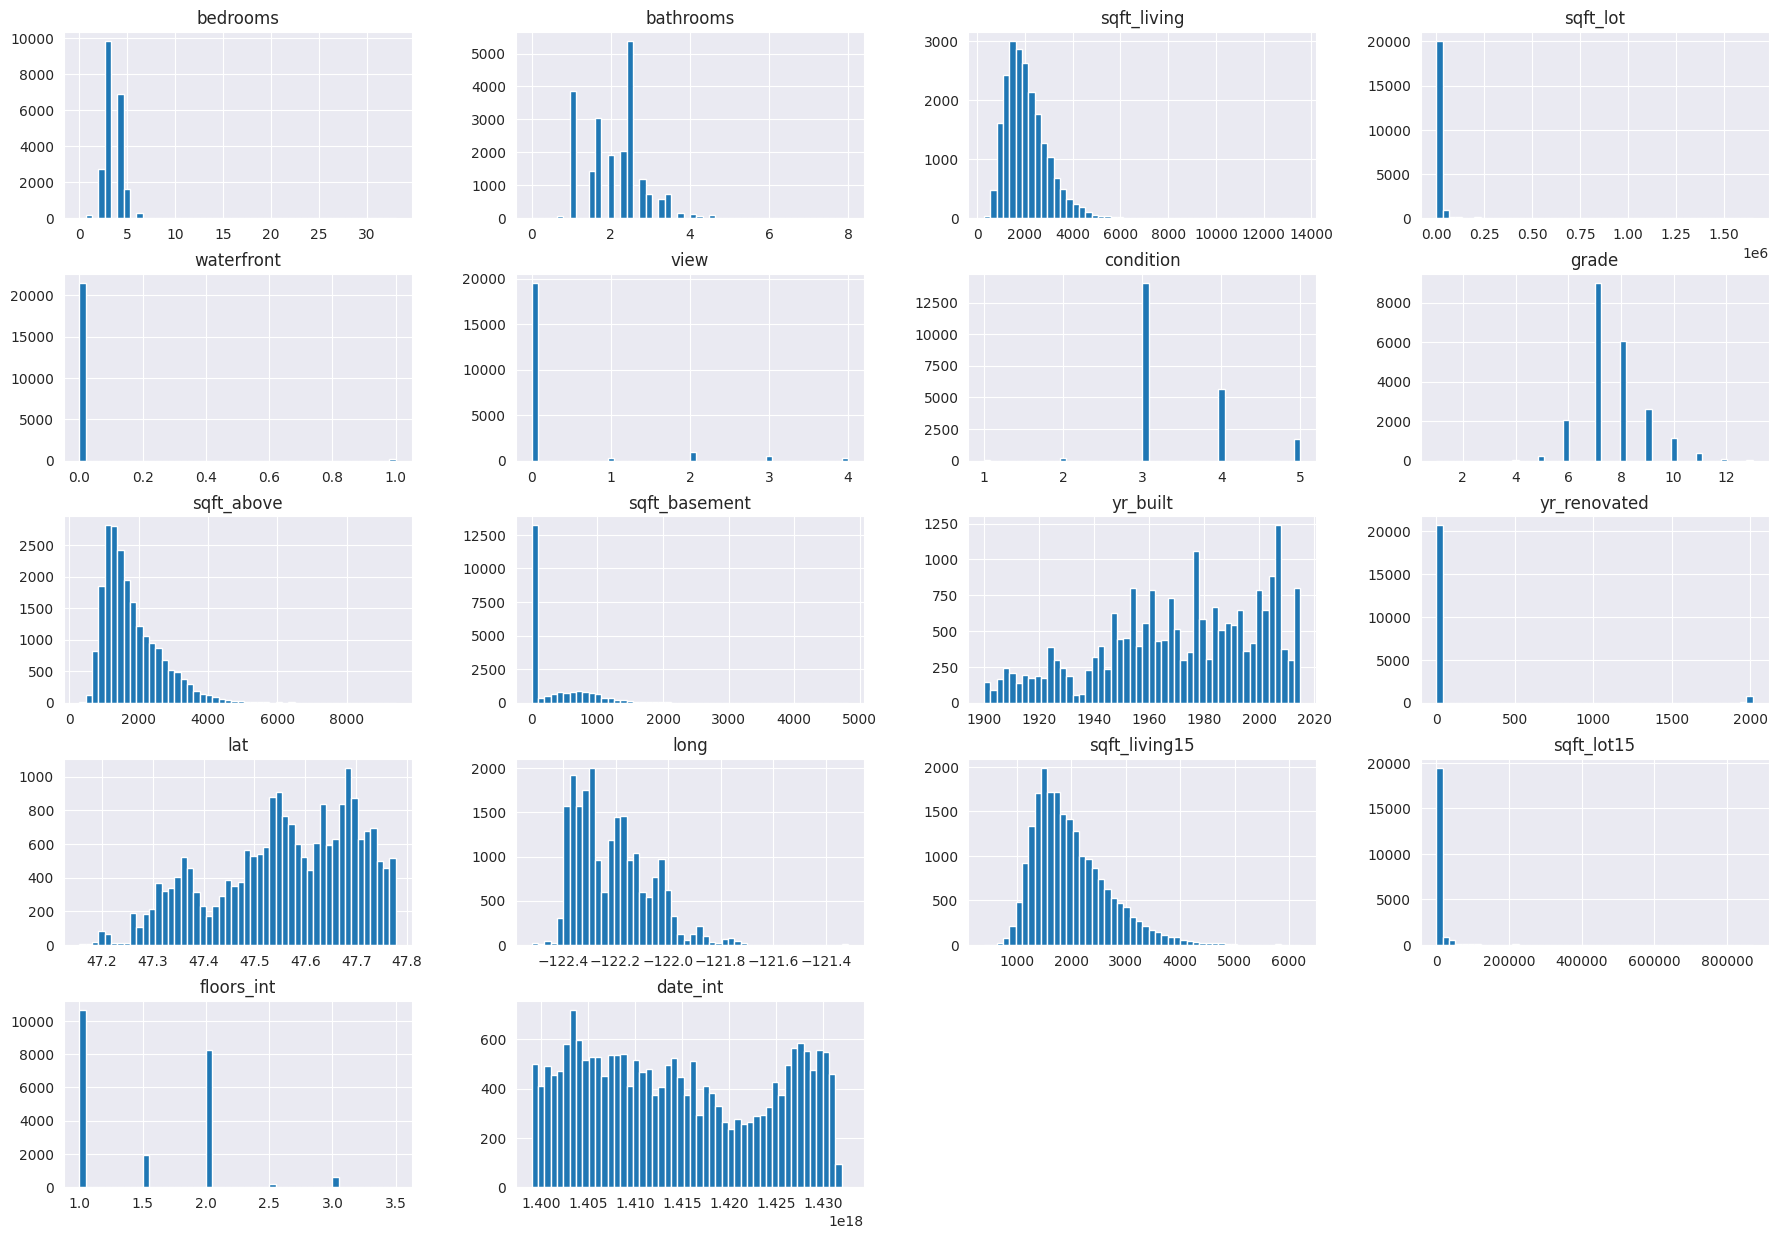

In [336]:
cleared[numeric].hist(bins=50, figsize=(22, 15))

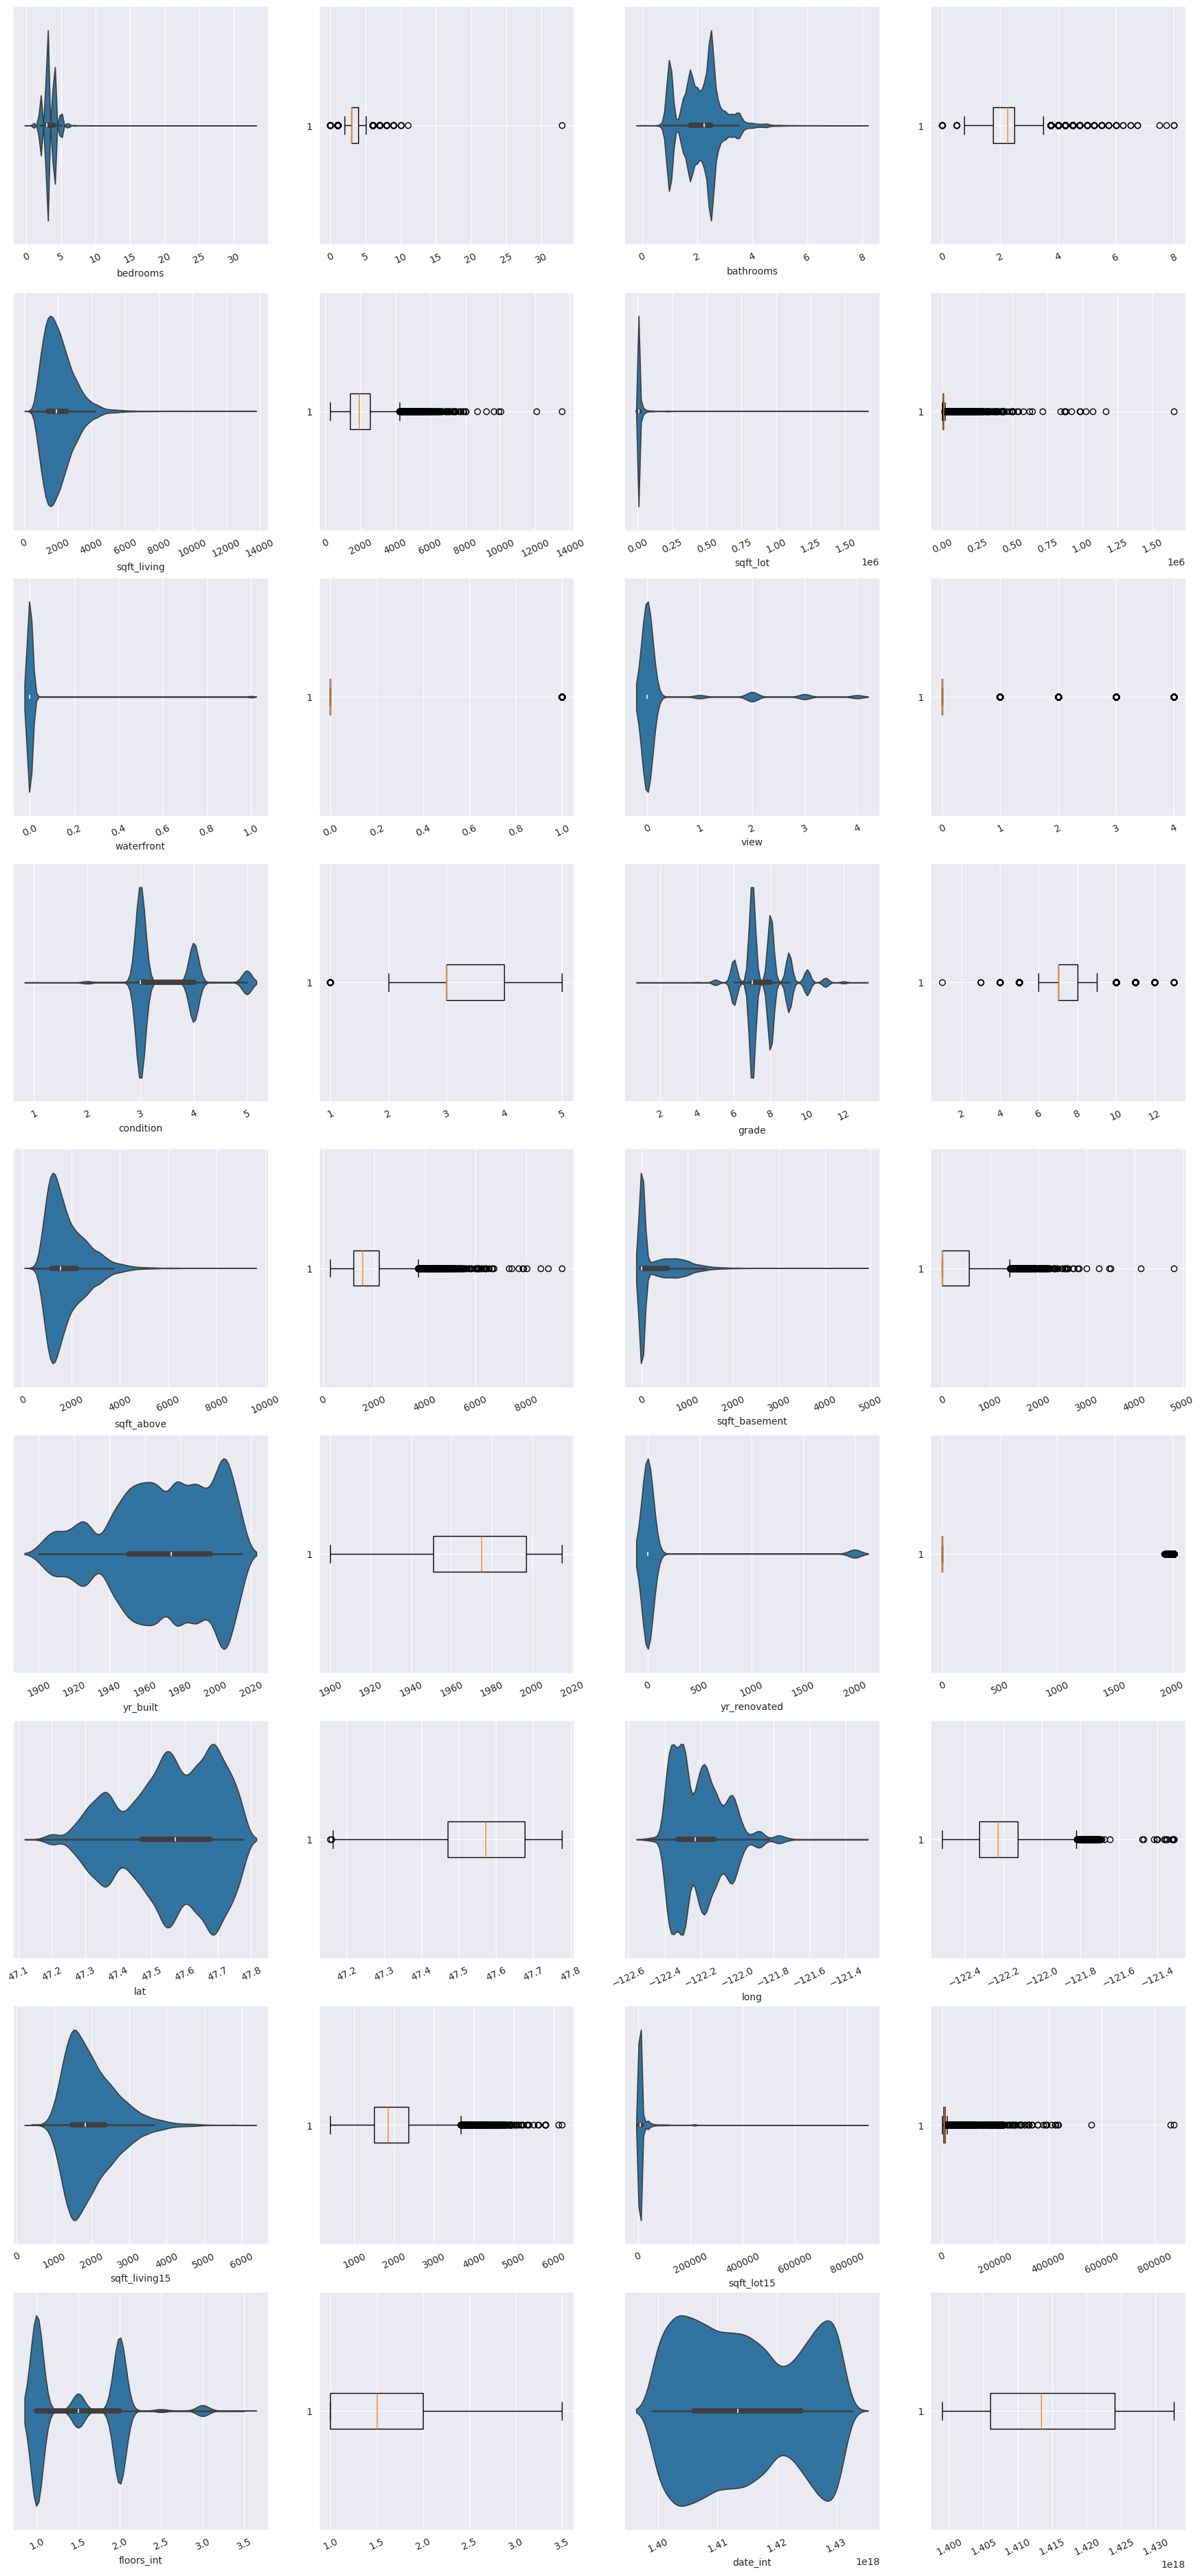

In [337]:
plt.figure(figsize=(22, 80))
for i, col in enumerate(numeric):
    plt.subplot(15, 4, (2 * i) + 1)
    sn.violinplot(data=cleared[col], orient="h")
    plt.xlabel(f"{col}")
    plt.xticks(rotation=25)
    plt.subplot(15, 4, (2 * i + 1) + 1)
    plt.boxplot(x=cleared[col], vert=False)
    plt.xticks(rotation=25)

<Axes: >

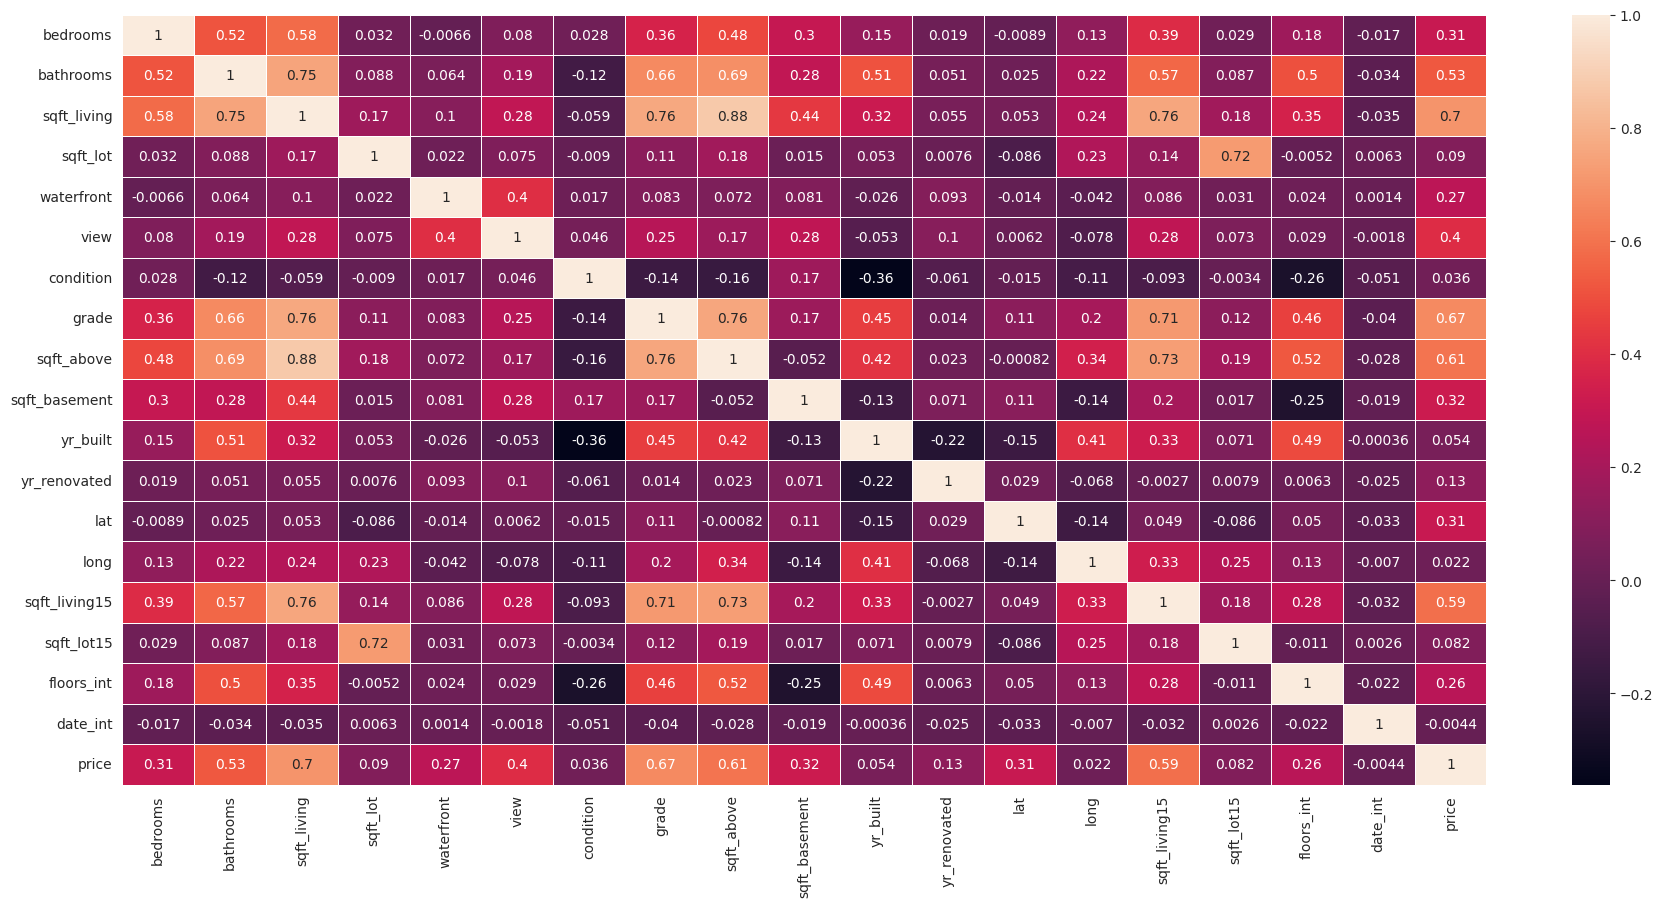

In [338]:
cleared_with_price = cleared.copy()
cleared_with_price['price'] = ceny

corr_matrix = cleared_with_price.corr()
fig, ax = plt.subplots(figsize=(22, 10))
sn.heatmap(corr_matrix, annot=True, linewidths=.5)

Do znaczących powiązań z `price` należą `bathrooms` (0.53), `sqft_living` (0.7), `grade` (0.67), `sqft_above` (0.61) oraz `sqft_living15` (0.59)

 # Wnioski
- Dane nie posiadają braków.
- Niektóre zmienne są zbyt skośne co będzie wymagało transformację logarytmiczną, pierwiastkową lub odwrotną.
- Zmienne posiadają szeroki zakres wartości i będą musiały być znormalizowane.
- Pewne dane mają dużo większy stopień korelacji niż reszta i z pewnością będą wykorzystane w modelu. Inne atrybuty będą musiały być poddane transformacji w celu zwiększenia ich wartości w predykcji. Być może część z nich zrekompensuje brak korelacji poprzez zwiększenie wartości innych atrybutów (np `floors_int` które intuicyjnie powinno mieć wpływ na cenę nieruchomości).

## Zadanie 2
Zaproponuj 5 nowych cech będących wynikiem przeprowadzonych w ramach Zadaniu 1 analiz lub doświadczeń.

In [339]:
cleared['long_plus_lat'] = cleared['long'] + cleared['lat']
cleared['grade_times_condition'] = cleared['grade'] * cleared['condition']
cleared['log_sqft_above'] = np.log(cleared['sqft_above'])
cleared['log_living_times_living_15'] = np.log(cleared['sqft_living'] * cleared['sqft_living15'])
cleared['bedrooms_times_bathrooms'] = cleared['bedrooms'] * cleared['bathrooms']

new_feature_names = ['long_plus_lat', 'grade_times_condition', 'log_sqft_above', 'log_living_times_living_15',
                     'bedrooms_times_bathrooms']

array([[<Axes: title={'center': 'long_plus_lat'}>,
        <Axes: title={'center': 'grade_times_condition'}>],
       [<Axes: title={'center': 'log_sqft_above'}>,
        <Axes: title={'center': 'log_living_times_living_15'}>],
       [<Axes: title={'center': 'bedrooms_times_bathrooms'}>, <Axes: >]],
      dtype=object)

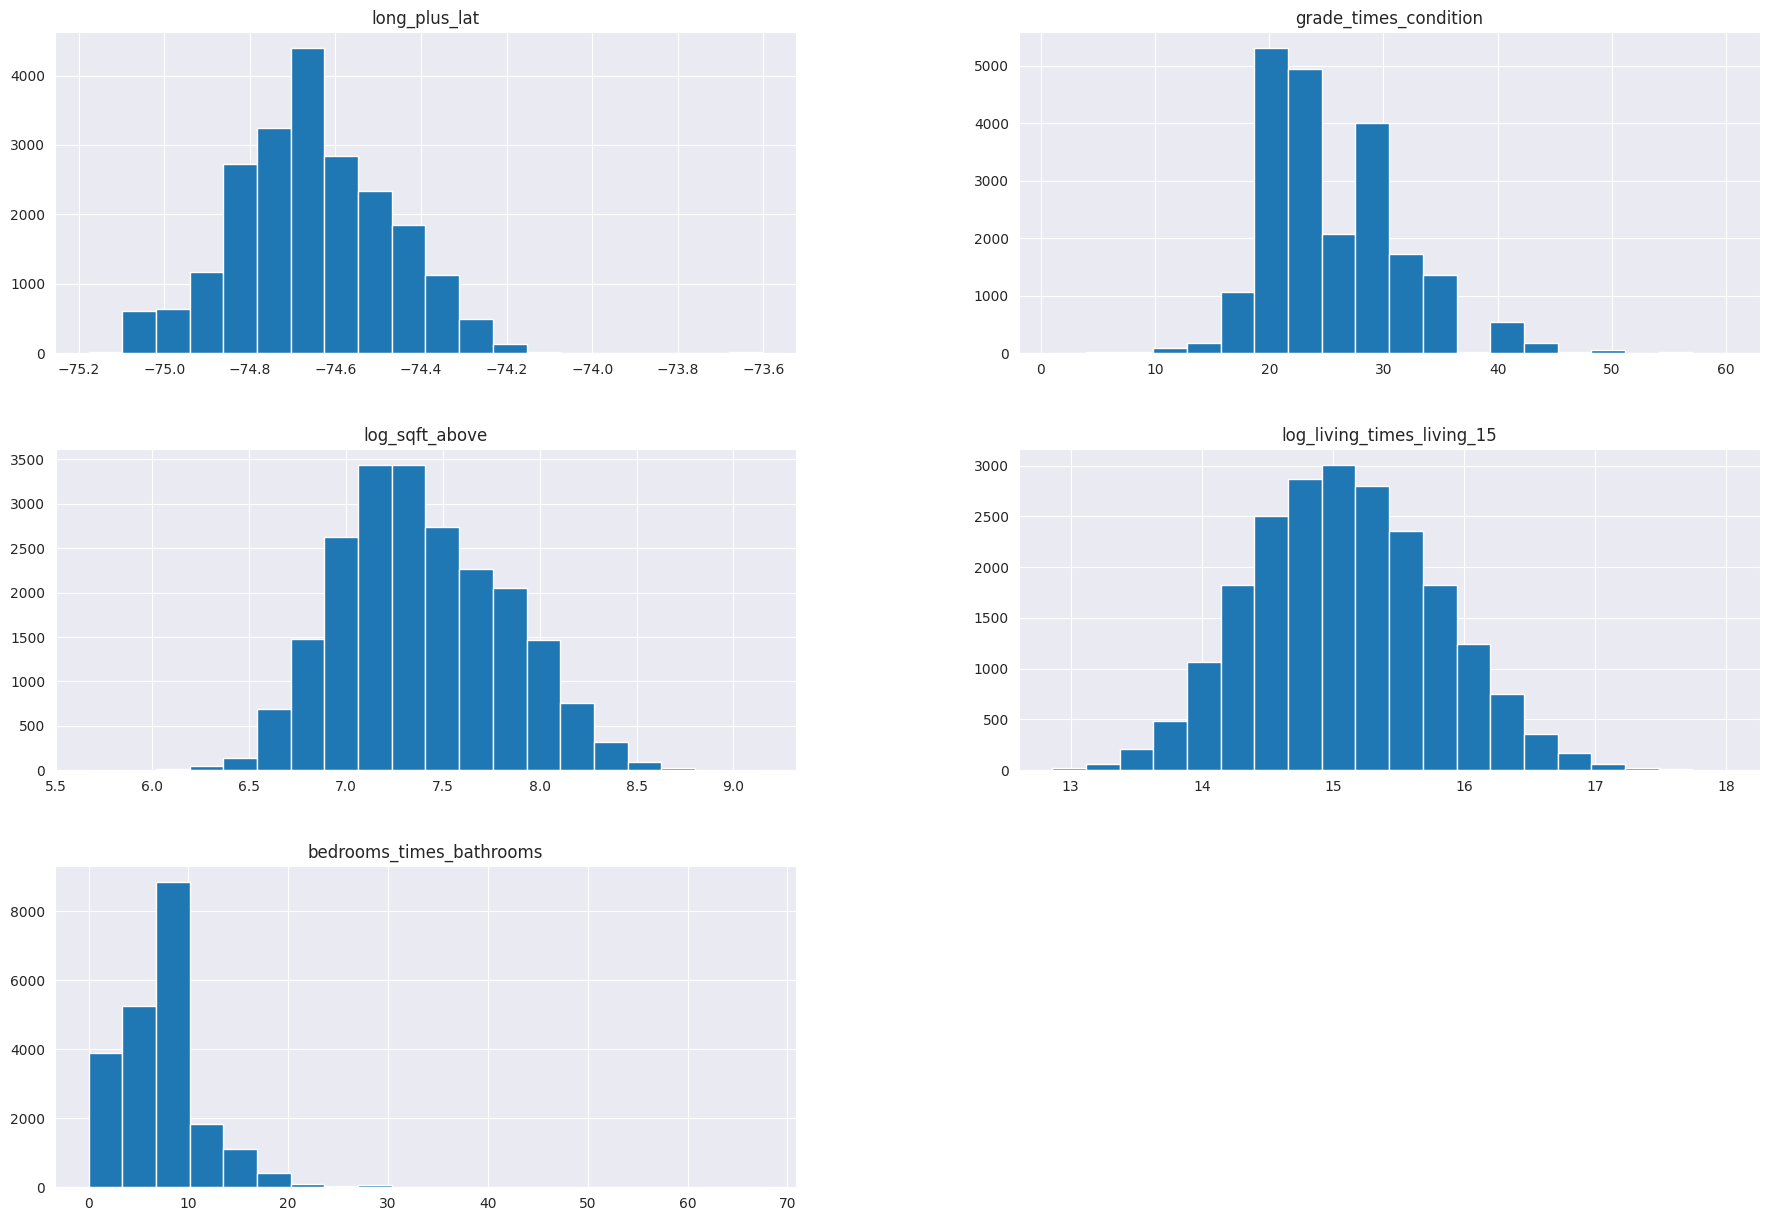

In [340]:
cleared[new_feature_names].hist(bins=20, figsize=(22, 15))

# Wnioski
Zostało dodanych 5 nowych cech:
- `long_plus_lat` - suma długości i szerokości geograficznej, takiej transformacji dokonuje się przy analizie danych geograficznych.
- `log_sqft_abov` - niwelowanie skośności `sqft_above`.
- `bedrooms_times_bathrooms` - iloczyn liczby sypialni i łazienek może przyjmować skokowo większe wartości dla dużych mieszkań.
- `grade_times_condition` - zwiększenie efektu wynikającego z `condition` poprzez pomnożenie przez `grade` .
- `log_living_times_living_15` - niwelowanie skośności `sqft_living` pomnożonego przez `sqft_living15`.

## Zadanie 3
Dokonaj wizualizacji nowych cech i określ ich korelację.

In [341]:
new_features_with_price = cleared[new_feature_names].copy()
new_features_with_price['price'] = ceny

<Axes: >

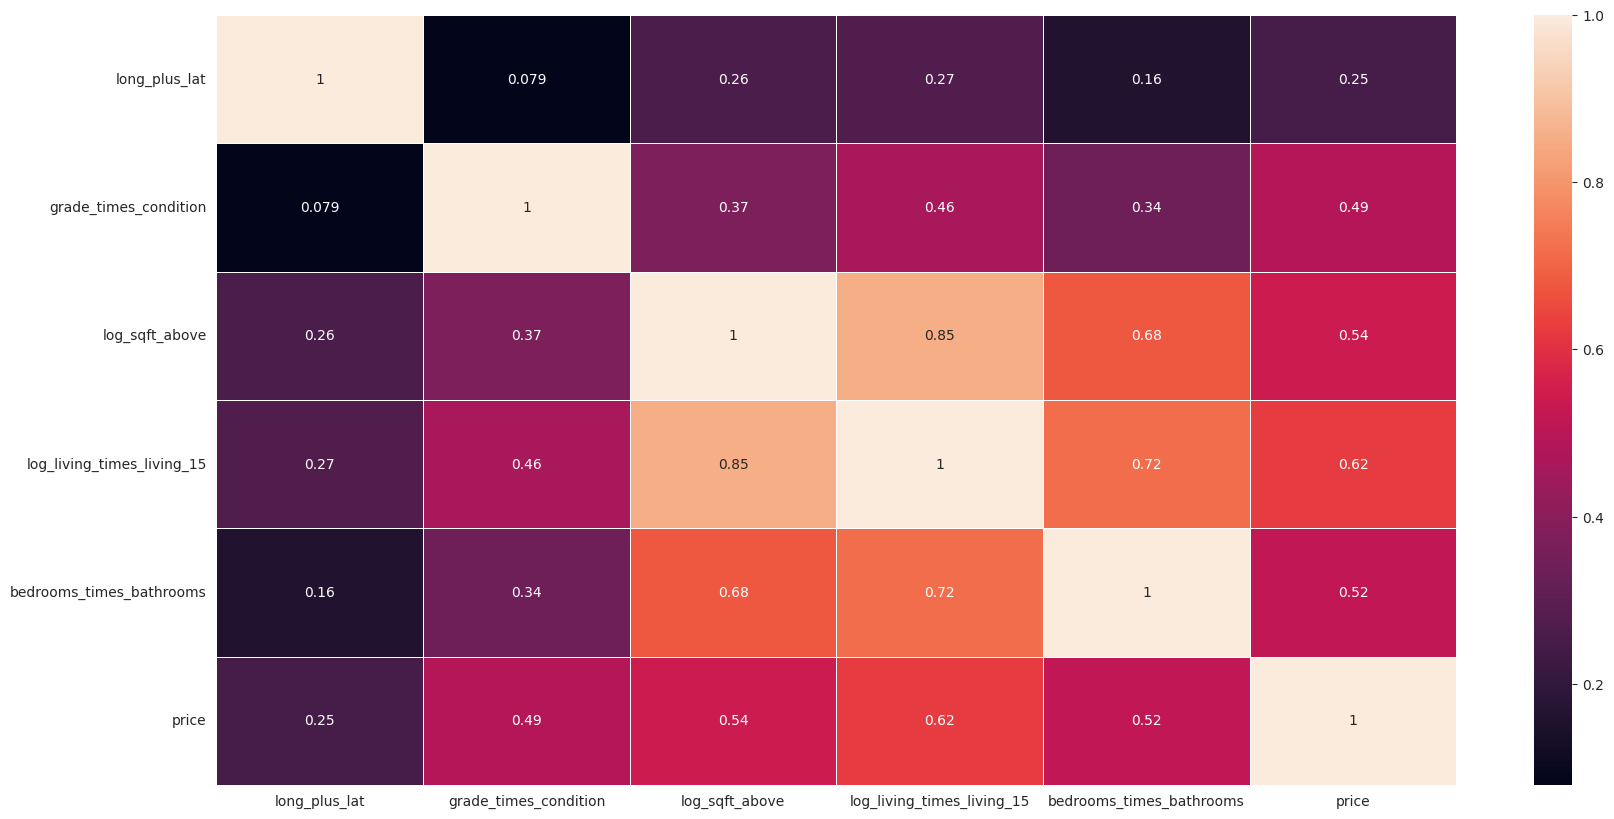

In [342]:
corr_matrix = new_features_with_price.corr()
fig, ax = plt.subplots(figsize=(20, 10))
sn.heatmap(corr_matrix, annot=True, linewidths=.5)

Najbardziej skorelowanymi z ceną są `log_living_times_living15` (0.63), `log_sqft_above` (0.54), `bedrooms_times_bathrooms` (0.52) i są to powiązania znaczące. Gorzej wypada sytuacja dla `long_plus_lat` (0.25) i `grade_times_condition` (0.49). Może to być związane z niedostatecznie dużym zakresem zbioru, gdyż intuicyjnie oba atrybuty powinny mieć wpływ na cenę nieruchomości.

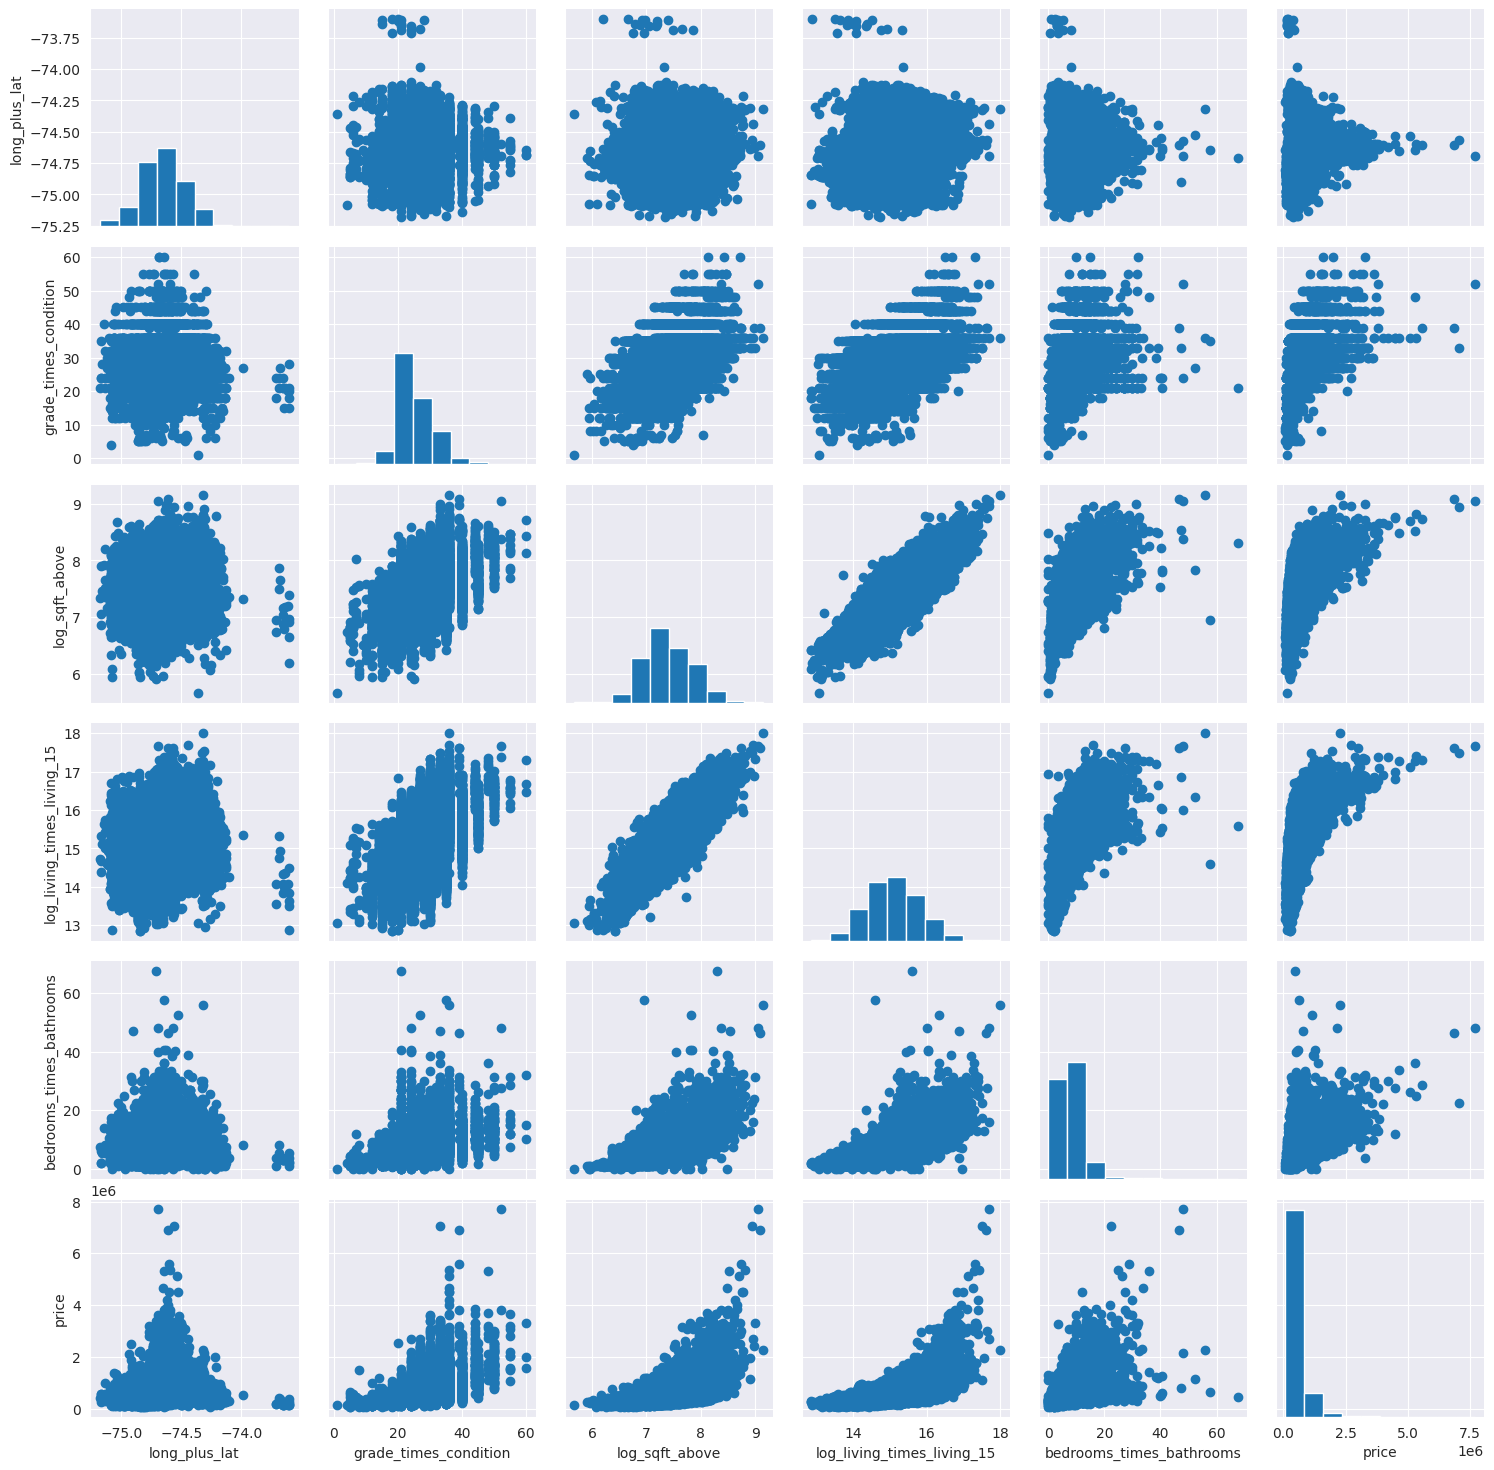

In [343]:
sn.PairGrid(new_features_with_price).map_diag(plt.hist).map_offdiag(plt.scatter)

Z wykresów widać, że dla żadnego z nowych atrybutów relacja nie jest do końca liniowa z `price`. Martwiące jest jednak to, że `log_sqft_above` ma dość silną liniową relację z `log_living_times_living15` co sugeruje współliniowość tych dwóch atrybutów. Może także zachodzić współliniowość z kilkoma atrybutami na raz, czego nie widać na wartościach samych relacji między sobą nawzajem w parach i będzie można sprawdzić dobiero przy wyliczeniu $VIF$ dla modeli.

# Spostrzeżenia
- Największa korelacja występuje między `log_living_times_living15` a `price` (0.63). Najmniejsza między `long_plus_lat` a `price` (0.25). To drugie może być kwestią małego zakresu wartości.
- Między `log_sqft_above` a `log_living_times_living15` występuje silna korelacja (0.8). Może to sugerować współliniowość.

## Dane do zadań

In [344]:
cleared.columns.values

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'floors_int', 'date_int', 'long_plus_lat',
       'grade_times_condition', 'log_sqft_above',
       'log_living_times_living_15', 'bedrooms_times_bathrooms'],
      dtype=object)

In [345]:
idx = 311351
cleared.drop('date_int', axis=1, inplace=True)
cleared.drop('floors_int', axis=1, inplace=True)
cleared.insert(0, 'const', np.ones((len(cleared), 1)))

# Split with new features
X_train, X_test, y_train, y_test = train_test_split(cleared, ceny, test_size=0.33, random_state=311351)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=311351)

## Zadanie 4

Wyznacz liniową zależność między 3 najbardziej skorelowanymi ze zmienną opisywaną zmiennymi opisującymi (wszystkie podane cechy + 5 nowo utworzonych). Do wyznaczenia liniowej zależności między cechami, a zmienną opisywaną wykorzystaj pseudoinwersję.

<Axes: >

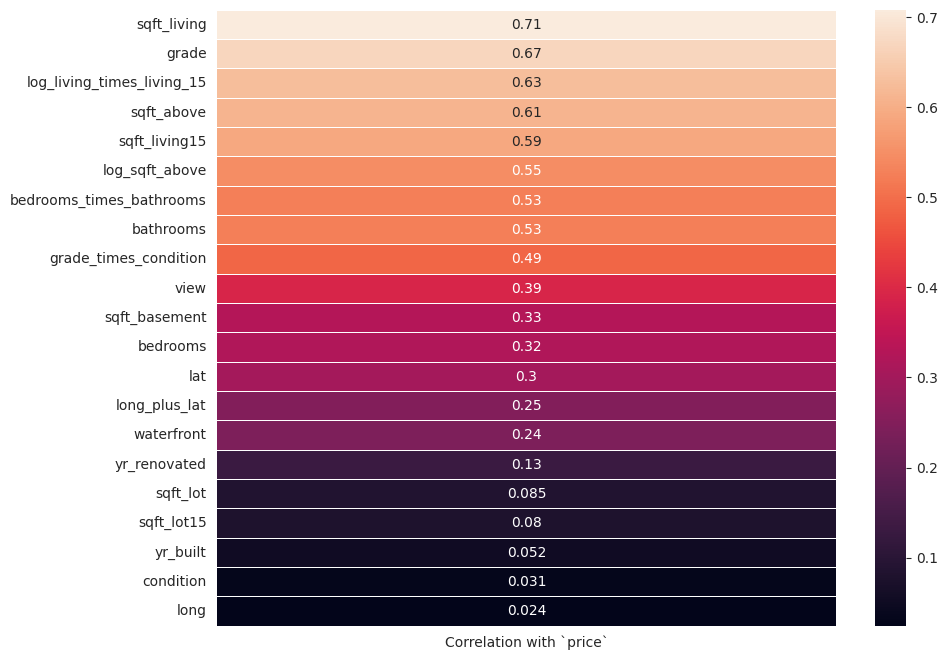

In [346]:
tmp_no_const = cleared.drop('const', axis=1)

corr_matrix = tmp_no_const.corrwith(ceny_train).to_frame(name='Correlation with `price`')
corr_matrix = corr_matrix.sort_values(by='Correlation with `price`', ascending=False)
plt.figure(figsize=(10, 8))

sn.heatmap(corr_matrix, annot=True, linewidths=.5)

In [347]:
top_3 = ['const', 'sqft_living', 'grade', 'log_living_times_living_15']

In [348]:
def linear_regression(X, y):
    if 'const' not in X.columns:
        X = X.copy()
        X.insert(0, 'const', 1)
    w = np.dot(np.linalg.pinv(X), y)
    e = np.mean((np.dot(X, w) - y) ** 2)
    return w, e


w, e = linear_regression(X_train[top_3], y_train)

In [349]:
for coefficient_with_label in zip(top_3, ):
    print(f'{coefficient_with_label[0]}: {coefficient_with_label[1]}')
print(f'Error: {e}')

const: 1560218.2940667195
sqft_living: 291.54969699346447
grade: 109543.00480968284
log_living_times_living_15: -163342.52120822508
Error: 60763528740.053314


Wynikowa estymacja to $ price = 1560218,3 + 291,55 \cdot sqft\_living + 109543 \cdot grade +  -163342,5 \cdot slog\_living\_times\_living\_15 $ z błędem $ 6.08 \cdot 10^{10} $.
# Wnioski
- Interesujące jest to, że `log_living_times_living15` ma ujemny wpływ na cenę nieruchomości. Może to wynikać z faktu, że mieszkania o większej powierzchni w okolicy są mniej "obrotne", tj. kawalerka sprzedaje się za więcej z metra niż mieszkania o dużym metrażu, które nominalnie, całościowo są droższe.

## Zadanie 5
Napisz metodę regresji krokowej w tył i za jej pomocą wybierz 5 najbardziej wartościowych cech.

In [350]:
constant_offset = 1
number_of_top_elements = 5 + constant_offset

In [351]:
def pinv_regression(X_train, y_train):
    if 'const' not in X_train.columns:
        X_train = X_train.copy()
        X_train.insert(0, 'const', 1)

    w = np.dot(np.linalg.pinv(X_train), y_train)
    rmse = np.sqrt(np.mean((y_train - np.dot(X_train, w)) ** 2))
    return w, rmse


def evaluate(x_val, y_val, w):
    if 'const' not in x_val.columns:
        x_val = x_val.copy()
        x_val.insert(0, 'const', 1)

    predictions = np.dot(x_val, w)
    rmse = np.sqrt(np.mean((y_val - predictions) ** 2))
    return rmse

In [352]:
def backward_stepwise_selection(X_train, y_train, X_val, y_val, stop=5, log_blacklisted=False):
    remaining_features = list(X_train.columns)
    rmse_list = []
    blacklisted = []
    for i in range(stop, len(remaining_features)):
        rmse_scores = {}
        for feature in remaining_features:
            current_features = [f for f in remaining_features if f != feature]
            model, err = pinv_regression(X_train[current_features], y_train)
            rmse = evaluate(X_val[current_features], y_val, model)
            rmse_scores[feature] = rmse
        feature_to_remove = min(rmse_scores, key=rmse_scores.get)
        remaining_features.remove(feature_to_remove)
        blacklisted.append(feature_to_remove)
        rmse_list.append(rmse_scores[feature_to_remove])
        if log_blacklisted:
            print(f"Iteration {i}: RMSE: {rmse_scores[feature_to_remove]:10.5f} :'{feature_to_remove}'")
            print(f"Blacklisted in iteration {i}: {blacklisted}")
    print("Remained features:", remaining_features)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(rmse_list) + 1), rmse_list, marker='o')
    plt.xlabel('Iteration')
    plt.ylabel('RMSE')
    plt.title('RMSE over iterations')
    plt.show()

Remained features: ['view', 'grade', 'sqft_above', 'yr_built', 'lat']


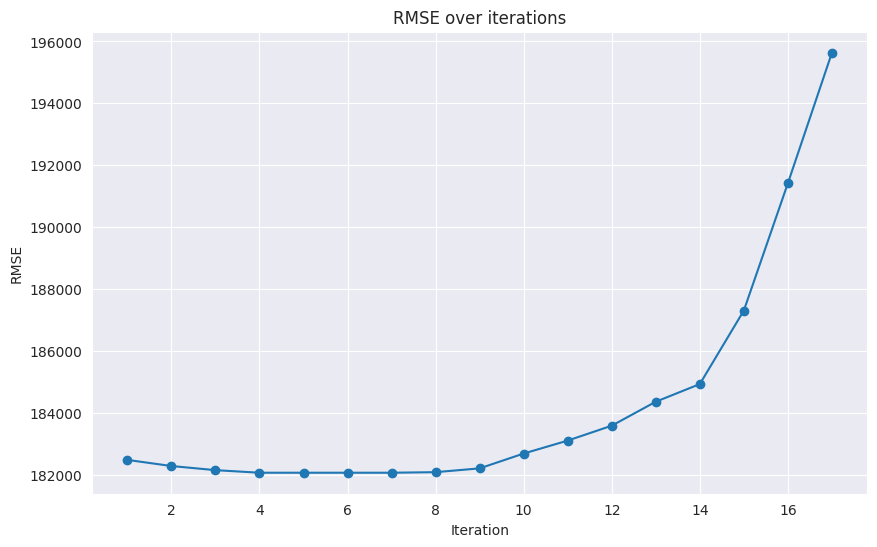

In [353]:
backward_stepwise_selection(X_train, y_train, X_val, y_val)

# Wnioski
- Im więcej cech jest usuniętych tym większy RMSE modelu co jest zgodne z oczekiwaniami. Mniejsza liczba atryubutów prowadzi do wzrostu obciążenia i zdolności generalizacji model. Po 7 iteracji algoorytm osiągnął najmniejszy RMSE, dalsze iteracje pogarszają wyniki predykcji. Co ciekawe usunięcie `sqft_basement` spowodowało "zgięcie" na wykresie. Może to wynikać z mniejszej ważności tego atrybutu w modelu, bowiem tempo wzrostu funkcji zmalało co może się wiązać z mniejszym wpływem na cenę nieruchomości.
- Pozostawione cechy `sqft_living`, `view`, `grade` z pozostałych wydają się zrozumiałe. Mniej intuicyjne jest to, że pozostały tam `yr_built` i `lat`, w szczególności `lat` bo `yr_built` może być w niebezpośreni sposób powiązany z sytuacją na rynku np. nowsze budownictwo jest tym droższe im wyższa jest cena nieruchomości nieproporcjonalnie do starego budownictwa.
- Metoda jest przydatna, generuje ona nieintuicyjne wyniki i nadaje się dobrze przy redukcji wariancji modelu kiedy do dystpozycji jest pełen zbiór danych do nauczania oraz gdy model jest dobrze określony.

## Zadanie 6
Dokonaj normalizacji cech (wszystkie podane + 5 zaproponowanych w Zadaniu 1) i przy pomocy metody Lasso lub LARS (metody mają zostać samodzielnie zaimplementowane) wybierz 5 najbardziej wartościowych cech.

**!!! Przy przekształceniach unikaj korzystania z informacji zawartej w zbiorze walidacyjnym i testowym !!!**

In [354]:
def min_max_scaler(X, mmin=None, mmax=None):
    if mmin is None or mmax is None:
        mmin = np.min(X, axis=0)
        mmax = np.max(X, axis=0)

    x_scaled = (X - mmin) / (mmax - mmin)
    x_scaled['const'] = np.ones(len(X))

    return x_scaled, mmin, mmax


def L2(train_x, test_x=None):
    train_x = np.array(train_x)
    normalizers = np.sqrt(np.sum(train_x ** 2, axis=0))
    norm_train_x = train_x / normalizers
    if test_x is not None:
        test_x = np.array(test_x)
        norm_test_x = test_x / normalizers
        return norm_train_x, norm_test_x, normalizers
    return norm_train_x, None, normalizers

In [355]:
def lasso(X, y, lamda, max_iter=10000, tol=1e-6):
    n, m = X.shape
    alfa_max = max(list(abs(np.dot(np.transpose(X[:, 1:]), y)))) / m
    if lamda >= alfa_max:
        # pozioma kreska
        return np.append(np.mean(y), np.zeros((n - 1)))
    w = np.zeros(m)
    for i in range(max_iter):
        w_old = w.copy()
        for j in range(m):
            y_pred = np.dot(X, w) - X[:, j] * w[j]
            rho_j = np.dot(X[:, j], (y - y_pred))
            w[j] = np.sign(rho_j) * max(abs(rho_j) - lamda / 2, 0) / np.sum(X[:, j] ** 2)
        if np.linalg.norm(w - w_old) < tol:
            print(f"Convergence after {i + 1} iterations")
            break
    return w


X_train_scaled, _, _ = L2(X_train)
y_train_scaled, _, _ = L2(y_train)
w_lasso = lasso(X_train_scaled, y_train_scaled, 0.01)
w_lasso

Convergence after 1771 iterations


array([-0.        , -0.18190734, -0.        ,  0.76599628,  0.        ,
        0.06266015,  0.08178278, -0.        ,  0.12172792,  0.        ,
        0.        , -0.20088239,  0.03604575, -0.        ,  0.        ,
        0.06834115, -0.02491235,  0.        ,  0.27427031, -0.        ,
       -0.        ,  0.02997306])

In [356]:
features_with_weights = list(zip(cleared.columns, w_lasso))
features_with_weights.sort(key=lambda x: abs(x[1]), reverse=True)

In [357]:
labels = [t[0] for t in features_with_weights[:5]]
values = [t[1] for t in features_with_weights[:5]]
lasso_top_5 = pd.DataFrame(values).T
lasso_top_5.columns = labels

In [358]:
lasso_top_5

,sqft_living,grade_times_condition,yr_built,bedrooms,grade
0,0.76600,0.27427,-0.20088,-0.18191,0.12173


# Wnioski
- Do najbardziej 5 najbardziej wartościowych atrybutów algorytm zaliczył `sqft_living`, `grade_times_condition`, `yr_built`, `bedrooms` oraz `grade`.
Przypominając wynik z regresji krokowej w tył:

`Remained features: ['sqft_living', 'view', 'grade', 'yr_built', 'lat']`

`sqft_living`, `yr_built` oraz `grade` się pokrywają, są więc one rzeczywiście ważne i wartościowe dla modelu.
### Spostrzeżenia
- Podczas implementacji miałem problem z rosnącym gradientem w algorytmie Lasso, co skutkowało zbyt dużymi wartościami wag. Problem ten został rozwiązany poprzez normalizację danych wejściowych (zarówno X i Y) ale też poprzez uproszczenie operacji numerycznych (pierwotna implementacja szła kolumna po kolumnie a więc atrybut po atrybucie). Skorzystałem z kilku różnych normalizacji ale jedyna która dała miarodajne wyniki była normalizacja normą L2.

## Zadanie 7
Zaimplementuj metodę spadku gradientów dla regularyzacji grzbietowej. Zabezpiecz się przed zbyt dużym współczynnikiem uczenia, badając zbieżność w każdym kroku i w razie potrzeby zmniejszając współczynnik uczenia $\sqrt{2}$ razy.

In [359]:
def min_max_scaler(X, mmin=None, mmax=None):
    if mmin is None or mmax is None:
        mmin = np.min(X, axis=0)
        mmax = np.max(X, axis=0)
    x_scaled = (X - mmin) / (mmax - mmin)
    x_scaled['const'] = np.ones(len(X))
    return x_scaled, mmin, mmax


def L2(train_x, test_x):
    train_x = np.array(train_x)
    test_x = np.array(test_x)
    normalizers = np.sqrt(np.sum(train_x ** 2, axis=0))
    norm_train_x = train_x / normalizers
    norm_test_x = test_x / normalizers
    return norm_train_x, norm_test_x, normalizers

In [360]:
def ridge_cost(X, y, lamda, w):
    predictions = X.dot(w)
    error = predictions - y
    return np.sqrt(1 / (2 * len(X)) * (np.sum(error ** 2) + lamda * np.sum(w[1:] ** 2)))

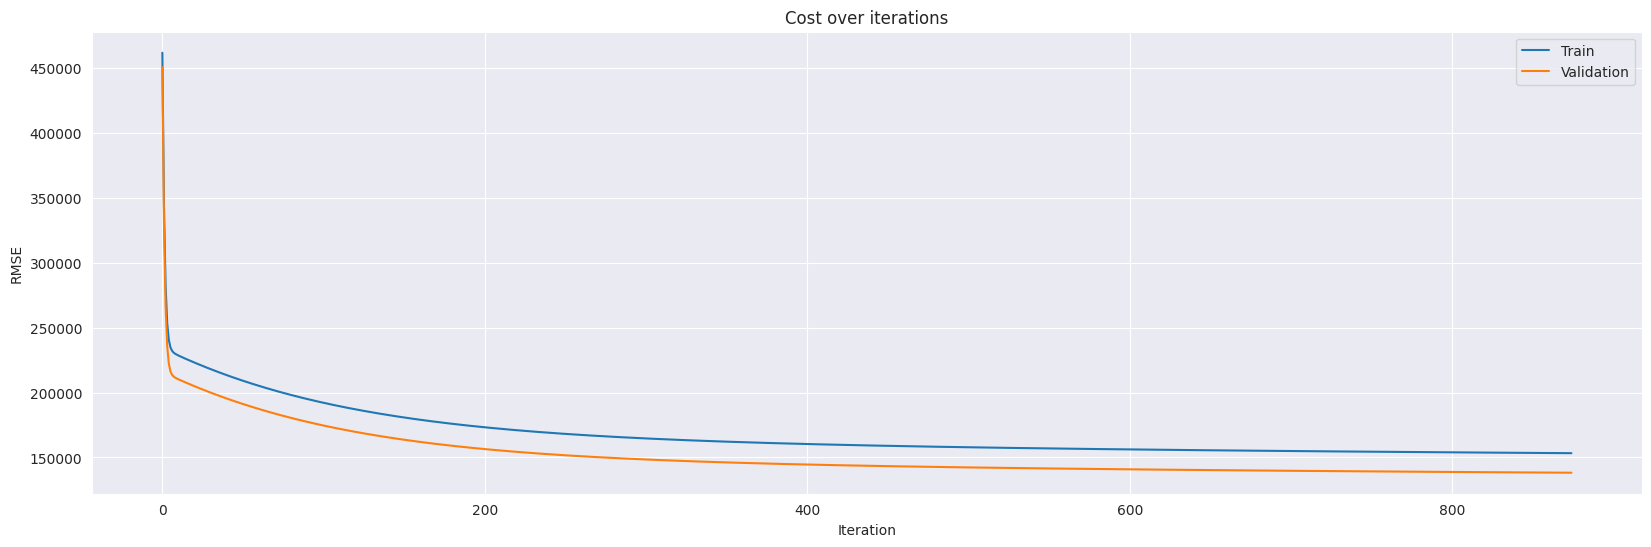

In [361]:
def ridge_descent(x_trainx, y_trainy, x_valx, y_valy, step_size, labda, tol=5e2, max_iter=10000,
                  decay_factor=np.sqrt(2), log=False):
    x_trainx = np.array(x_trainx)
    y_trainy = np.array(y_trainy)
    x_valx = np.array(x_valx)
    y_valy = np.array(y_valy)

    n, m = x_trainx.shape
    beta = np.zeros(m)
    history = []
    val_hisory = []

    for iteration in range(max_iter):
        history.append(ridge_cost(x_trainx, y_trainy, labda, beta))
        val_hisory.append(ridge_cost(x_valx, y_valy, labda, beta))
        predictions = x_trainx.dot(beta)
        residuals = predictions - y_trainy
        # intercept handling
        tmp_beta = np.insert(beta[1:].copy(), 0, 0)
        gradient = (1 / n) * (x_trainx.T.dot(residuals) + labda * tmp_beta)
        beta_n = beta - step_size * gradient
        if np.linalg.norm(beta_n - beta, ord=2) < tol:
            if (log):
                print(f"Convergence after {iteration + 1} iterations")
            break
        if iteration > 0 and val_hisory[-1] > val_hisory[-2]:
            step_size *= 1 / decay_factor
            if (log):
                print(f"Reducing learning rate: {step_size}.")
        beta = beta_n
    return beta, history, val_hisory


X_train_scaled, mins, maxs = min_max_scaler(X_train)
X_val_scaled, _, _ = min_max_scaler(X_val, mins, maxs)
step_size = 0.1
labda = 0.01

w, history, val_history = ridge_descent(X_train_scaled, y_train, X_val_scaled, y_val, step_size, labda)
plt.figure(figsize=(20, 6))
plt.plot(history, label="Train")
plt.plot(val_history, label="Validation")
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.title("Cost over iterations")
plt.legend()
plt.show()

## Zadanie 8
Dla 5 wybranych w Zadaniu 5 cech dokonaj doboru współczynnika regularyzacji dla metody grzbietowej. 

*Skorzystaj z własnej implementacji regresji z Zadania 7. Zacznij od wysokiego współczynnika uczenia.*

In [362]:
z5_attr = ['sqft_living', 'view', 'grade', 'yr_built', 'lat']

In [363]:
def lambda_generator(min=0.01, max=1000000):
    value = min
    while value <= max:
        yield value
        value *= 2

In [364]:
coeffs_sum = []
validationm_errors = []
for lambda_reg in lambda_generator():
    w, cost_history, cost_val_history = ridge_descent(X_train_scaled[z5_attr], y_train, X_val_scaled[z5_attr],
                                                      y_val, step_size=0.8, labda=lambda_reg)
    coeffs_sum.append(np.sum(w))
    validationm_errors.append(cost_val_history[-1])

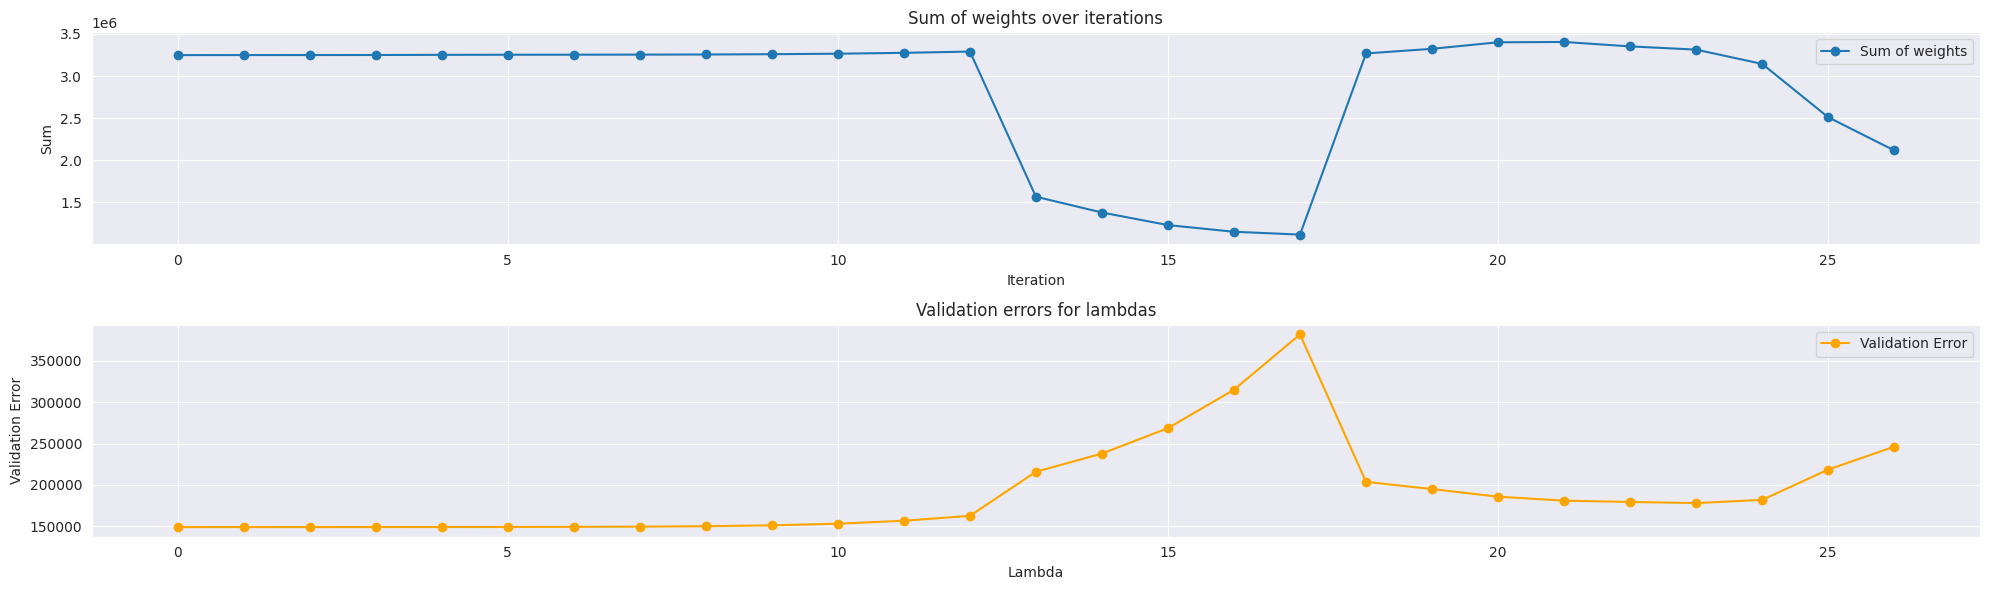

In [365]:
fig, axes = plt.subplots(2, 1, figsize=(20, 6))
axes[0].plot(coeffs_sum, marker='o', label="Sum of weights")
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Sum")
axes[0].set_title("Sum of weights over iterations")
axes[0].legend()
axes[1].plot(validationm_errors, marker='o', label="Validation Error", color="orange")
axes[1].set_xlabel("Lambda")
axes[1].set_ylabel("Validation Error")
axes[1].set_title("Validation errors for lambdas")
axes[1].legend()
plt.tight_layout()
plt.show()
#

# Wnioski
- wzrost współczynnika regularyzacji powoduje spadek sumy wag co jest zgodne z założeniami. Funkcja kosztu wyrażona jest wzorem
$RSS + \lambda \sum_{j=1}^{p} \beta_{j}^{2}$, a więc wzrost kary jest proporcjonalny do kwadratu współczynników tym samym suma wsp. maleje.
- w przypadku modelowanego problemu, tępo błędu walidacji nie jest jednolite i na obszarze, między 0.01, a od ok 10 wzrasta bardzo gwałtownie, potem gwałtownie opada po czym znowu wzrasta. Prawdopodobnie wiąże się to z z miejscem gdzie wzrost obciążenia przecina się z malejącą wariancją.
- regularyzacja tą metodą dla danego problemu wydaje się być niepotrzebna gdyż prowadzi do wzrostu błędu. Wsp. $\lambda$ powinien być na niskim poziomie między $0.01$


## Zadanie 9
Wytrenuj 5 modeli:
1. Wykorzystujący wszystkie cechy dane w zbiorze.
2. Wykorzystujący wszystkie cechy dane w zbiorze + 5 zaproponowanych.
3. Wykorzystujący 5 cech wybranych regresją krokową w tył.
4. Wykorzystujące tylko cechy wybrane dzięki metodzie Lasso/LARS.
5. Wykorzystujące cechy wybrane w metodzie Lasso/LARS i poddane regularyzacji grzbietowej dla wybranego współczynnika regularyzacji.

In [366]:
all_bundled = ['const', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
               'waterfront', 'view', 'condition', 'grade', 'sqft_above',
               'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
               'sqft_living15', 'sqft_lot15']

assert all(f in X_train.columns.values for f in all_bundled) and all(f in X_test.columns.values for f in all_bundled)

In [367]:
all_bundled_plus_new = ['const', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                        'waterfront', 'view', 'condition', 'grade', 'sqft_above',
                        'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
                        'sqft_living15', 'sqft_lot15', 'long_plus_lat',
                        'grade_times_condition', 'log_sqft_above',
                        'log_living_times_living_15', 'bedrooms_times_bathrooms']

assert all(f in X_train.columns.values for f in all_bundled_plus_new) and all(
    f in X_test.columns.values for f in all_bundled_plus_new)

In [368]:
stepwise_reg_5 = ['view', 'grade', 'sqft_above', 'yr_built', 'lat']
assert all(f in X_train.columns.values for f in stepwise_reg_5) and all(
    f in X_test.columns.values for f in stepwise_reg_5)

In [369]:
lasso_5 = ['sqft_living', 'grade_times_condition', 'yr_built', 'bedrooms', 'grade']
assert all(f in X_train.columns.values for f in lasso_5) and all(f in X_test.columns.values for f in lasso_5)

In [370]:
model_features = {"all_bundled": all_bundled, "all_bundled_plus_new": all_bundled_plus_new,
                  "stepwise_regression_top_5": stepwise_reg_5, "lasso_regularization_top_5": lasso_5,
                  "lasso_plus_ridge_regularization_top_5": lasso_5}

In [371]:
def min_max_scaler(X, mmin=None, mmax=None):
    if mmin is None or mmax is None:
        mmin = np.min(X, axis=0)
        mmax = np.max(X, axis=0)
    x_scaled = (X - mmin) / (mmax - mmin)
    x_scaled['const'] = np.ones(len(X))
    return x_scaled, mmin, mmax


def L2(train_x, test_x):
    train_x = np.array(train_x)
    test_x = np.array(test_x)
    normalizers = np.sqrt(np.sum(train_x ** 2, axis=0))
    norm_train_x = train_x / normalizers
    norm_test_x = test_x / normalizers
    return norm_train_x, norm_test_x, normalizers

In [372]:
def pinv_regression(X_train, y_train):
    if 'const' not in X_train.columns:
        X_train = X_train.copy()
        X_train.insert(0, 'const', 1)

    w = np.dot(np.linalg.pinv(X_train), y_train)
    rmse = np.sqrt(np.mean((y_train - np.dot(X_train, w)) ** 2))
    return w, rmse

def ridge_regression(X_train, y_train, labda):
    if 'const' not in X_train.columns:
        X_train = X_train.copy()
        X_train.insert(0, 'const', 1)

    X_t = X_train.T
    XX_t = np.dot(X_t, X_train)
    L = labda * np.eye(X_train.shape[1])
    L[0][0] = 0
    X_ty = np.dot(X_t, y_train)
    w = np.dot(np.linalg.inv(XX_t + L), X_ty)
    rmse = np.sqrt(np.mean((y_train - np.dot(X_train, w)) ** 2))
    return w, rmse

def evaluate(x_val, y_val, w):
    if 'const' not in x_val.columns:
        x_val = x_val.copy()
        x_val.insert(0, 'const', 1)

    predictions = np.dot(x_val, w)
    rmse = np.sqrt(np.mean((y_val - predictions) ** 2))
    return rmse

In [373]:
X_train_scaled, mmin, mmax = min_max_scaler(X_train)
X_test_scaled, _, _ = min_max_scaler(X_val, mmin, mmax)
X_val_scaled, _, _ = min_max_scaler(X_val, mmin, mmax)
ws = {}
RMSE_val = {}
RMSE_train = {}

In [374]:
for name, vals in model_features.items():
    w, rmse_train = pinv_regression(X_train_scaled[vals], y_train)
    ws[name] = w
    RMSE_val[name] = evaluate(X_val_scaled[vals], y_val, w)
    RMSE_train[name] = rmse_train

In [385]:
ridge_feats = model_features["lasso_plus_ridge_regularization_top_5"]

w, rmse_train = ridge_regression(X_train_scaled[ridge_feats], y_train, 0.01)
ws["ridge_trained"] = w
RMSE_val["ridge_trained"] = evaluate(X_val_scaled[ridge_feats], y_val, w)
RMSE_train["ridge_trained"] = rmse_train

## Zadanie 10
Dokonaj oceny i porównania modeli z Zadania 9. Wybierz najlepszy model.

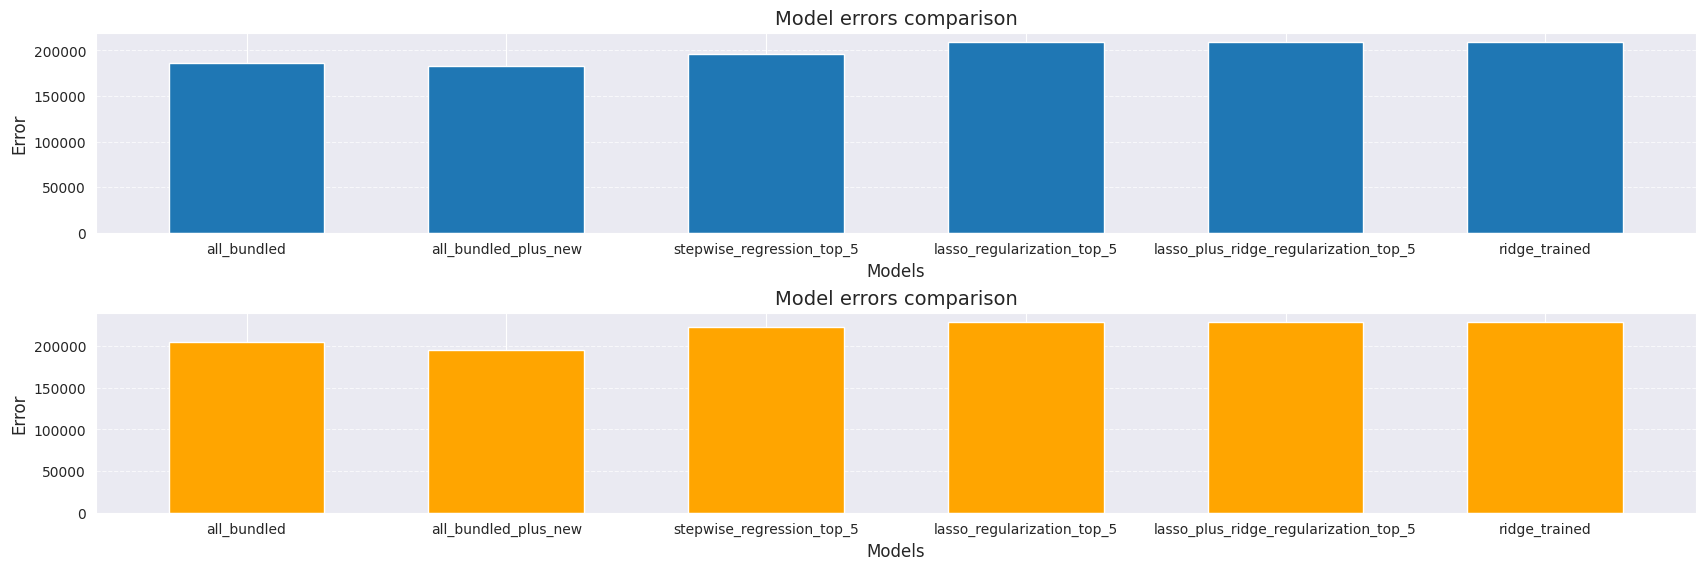

In [387]:
fig, axes = plt.subplots(2, 1, figsize=(20, 6))
axes[0].bar(range(len(RMSE_val)), RMSE_val.values(), tick_label=RMSE_val.keys(), width=0.6)
axes[0].set_xlabel('Models', fontsize=12)
axes[0].set_ylabel('Error', fontsize=12)
axes[0].set_title('Model errors comparison', fontsize=14)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].bar(range(len(RMSE_train)), RMSE_train.values(), tick_label=RMSE_train.keys(), width=0.6, color='orange')
axes[1].set_xlabel('Models', fontsize=12)
axes[1].set_ylabel('Error', fontsize=12)
axes[1].set_title('Model errors comparison', fontsize=14)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
plt.show()